In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.metrics import AUC
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from fastcore.all import *
#from fastdownload import download_url
#from fastai.vision.all import *
from PIL import ImageFile,Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
path = Path("C:/Users/gteja/Downloads/chest_imgs/chest_xray")
path

Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray')

In [4]:
def CreateData(dataframe, folder, label, fp,dir,index):
    for i,img in enumerate(folder):
        fname = os.path.basename(img)
        imgpath = os.path.join(fp,os.path.join(Path(dir),Path(fname)))
        vals = {'imagePath': imgpath, 'label': label}
        tempdf = pd.DataFrame(data = vals,index=[i+index])
        dataframe = pd.concat([dataframe,tempdf])
    return dataframe

In [5]:
val_pneumonia = (path/"val/PNEUMONIA").ls()
val_normal = (path/"val/NORMAL").ls()
val_normal

(#8) [Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg'),Path('C:/Users/gteja/Downloads/chest_imgs/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg')]

In [6]:
cols = ['imagePath','label']
vals = pd.DataFrame(columns=cols)
vals = CreateData(vals,val_pneumonia,1,path,"val/PNEUMONIA",0)
vals = CreateData(vals,val_normal,0,path,"val/NORMAL",len(vals['imagePath']))

In [7]:
vals.describe()


,imagePath,label
count,16,16
unique,16,2
top,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,1
freq,1,8


In [8]:
test_pneumonia = (path/"test/PNEUMONIA").ls()
test_normal = (path/"test/NORMAL").ls()

train_pneumonia = (path/"train/PNEUMONIA").ls()
train_normal = (path/"train/NORMAL").ls()

In [9]:
test = pd.DataFrame(columns=cols)
train = pd.DataFrame(columns=cols)

test = CreateData(test,test_pneumonia,1,path,"test/PNEUMONIA",0)
test = CreateData(test,test_normal,0,path,"test/NORMAL",len(test['imagePath']))

train = CreateData(train,train_pneumonia,1,path,"train/PNEUMONIA",0)
train = CreateData(train,train_normal,0,path,"train/NORMAL",len(train['imagePath']))

In [10]:
test.tail()

,imagePath,label
619,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,0
620,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,0
621,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,0
622,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,0
623,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,0


In [11]:
test['label'].value_counts()

1    390
0    234
Name: label, dtype: int64

In [12]:
train['label'].value_counts()

1    3875
0    1341
Name: label, dtype: int64

In [13]:
train['imagePath']

0       C:\Users\gteja\Downloads\chest_imgs\chest_xray...
1       C:\Users\gteja\Downloads\chest_imgs\chest_xray...
2       C:\Users\gteja\Downloads\chest_imgs\chest_xray...
3       C:\Users\gteja\Downloads\chest_imgs\chest_xray...
4       C:\Users\gteja\Downloads\chest_imgs\chest_xray...
                              ...                        
5211    C:\Users\gteja\Downloads\chest_imgs\chest_xray...
5212    C:\Users\gteja\Downloads\chest_imgs\chest_xray...
5213    C:\Users\gteja\Downloads\chest_imgs\chest_xray...
5214    C:\Users\gteja\Downloads\chest_imgs\chest_xray...
5215    C:\Users\gteja\Downloads\chest_imgs\chest_xray...
Name: imagePath, Length: 5216, dtype: object

In [14]:
train.describe()

,imagePath,label
count,5216,5216
unique,5216,2
top,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,1
freq,1,3875


In [15]:
def load_image(path):
    img = Image.open(path)
    img = img.resize((224, 224))  # Resize
    img_array = np.array(img) / 255.0  # Normalize
    return img_array


In [16]:
vals['imagePath'][1]

'C:\\Users\\gteja\\Downloads\\chest_imgs\\chest_xray\\val\\PNEUMONIA\\person1946_bacteria_4875.jpeg'

In [17]:
print(load_image(vals['imagePath'][0]))

[[0.0627451  0.0745098  0.07843137 ... 0.05098039 0.04705882 0.04705882]
 [0.0627451  0.07058824 0.0745098  ... 0.07058824 0.0745098  0.0745098 ]
 [0.0627451  0.07058824 0.07843137 ... 0.09411765 0.0745098  0.0627451 ]
 ...
 [0.01568627 0.02745098 0.02352941 ... 0.00784314 0.01568627 0.01176471]
 [0.25098039 0.03137255 0.02352941 ... 0.00784314 0.01176471 0.23529412]
 [0.06666667 0.03137255 0.02352941 ... 0.00784314 0.01568627 0.05490196]]


In [18]:
vals['image'] = vals['imagePath'].apply(load_image)

In [19]:
test['imagePath'][1]

'C:\\Users\\gteja\\Downloads\\chest_imgs\\chest_xray\\test\\PNEUMONIA\\person100_bacteria_477.jpeg'

In [20]:
vals.head()

,imagePath,label,image
0,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,1,"[[0.06274509803921569, 0.07450980392156863, 0...."
1,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,1,"[[0.00784313725490196, 0.00784313725490196, 0...."
2,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,1,"[[0.00392156862745098, 0.3137254901960784, 0.8..."
3,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,1,"[[0.0, 0.0, 0.00784313725490196, 0.03529411764..."
4,C:\Users\gteja\Downloads\chest_imgs\chest_xray...,1,"[[0.0, 0.0, 0.0, 0.023529411764705882, 0.04313..."


In [21]:
test['image'] = test['imagePath'].apply(load_image)

In [24]:
train['image'] = train['imagePath'].apply(load_image)


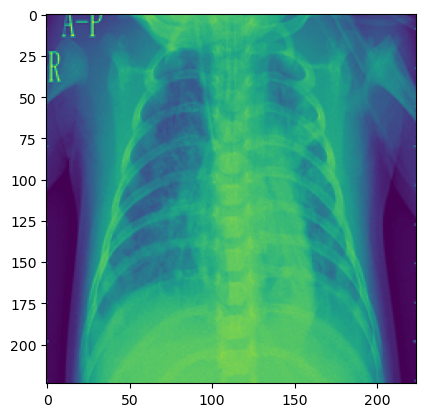

In [25]:
plt.imshow(vals['image'][0])

<h4>Test CNN</h4>

In [59]:
sample_model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(64,64,1)),
    
    keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


In [60]:
sample_model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC(),'accuracy'])

In [33]:

train_datagen = ImageDataGenerator( rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
train_new = pd.DataFrame(train)

In [35]:
def img_namer(num):
    name = 'Pneumonia'
    if(num==0):
        name = 'Normal'
    return name
train_new['name'] = train_new['label'].apply(img_namer)

In [36]:
train_new['name'].value_counts()

Pneumonia    3875
Normal       1341
Name: name, dtype: int64

In [74]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_new,
                                                    directory=None,
                                                    x_col='imagePath',
                                                    y_col='name',
                                                    target_size=(64,64),
                                                    batch_size=20,
                                                    color_mode='grayscale',
                                                    class_mode='binary'
                                                    )

Found 5216 validated image filenames belonging to 2 classes.


In [75]:
len(train_generator)

261

In [48]:
val_new = pd.DataFrame(vals)
val_new['name'] = val_new['label'].apply(img_namer)

test_new = pd.DataFrame(test)
test_new['name'] = test_new['label'].apply(img_namer)

In [49]:
test_new['name'].value_counts()

Pneumonia    390
Normal       234
Name: name, dtype: int64

In [76]:
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_new,
    directory=None,
    x_col='imagePath',
    y_col='name',
    target_size=(64, 64),
    batch_size=20,
    color_mode='grayscale',
    class_mode='binary'
)



Found 16 validated image filenames belonging to 2 classes.


In [51]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_new,
    directory=None,
    x_col='imagePath',
    y_col='name',
    target_size=(64, 64),
    batch_size=128,
    color_mode='grayscale',
    class_mode='binary'
)

Found 624 validated image filenames belonging to 2 classes.


In [77]:
sample_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

Epoch 1/5


C:\Users\gteja\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


261/261 ━━━━━━━━━━━━━━━━━━━━ 81s 307ms/step - accuracy: 0.8948 - auc_3: 0.9467 - loss: 0.2527 - val_accuracy: 0.8750 - val_auc_3: 0.9531 - val_loss: 0.3276
Epoch 2/5


C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


AttributeError: 'NoneType' object has no attribute 'items'

<h3>New CNN without using generators</h3>

In [95]:
model = keras.Sequential([
    
    keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu',padding='same',input_shape=(224,224,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters = 32,kernel_size=3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


C:\Users\gteja\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [123]:
x_train = train.drop(['imagePath','label','name'],axis=1)
x_train['image'][0].dtype

dtype('float64')

In [124]:
def conv(img):
    return img.astype(np.float32)

In [125]:
x_train['image'] = x_train['image'].apply(conv)

In [126]:
x_train['image'][0].dtype

dtype('float32')

In [118]:
y_train = train.drop(['imagePath','image','name'],axis=1)
y_train.shape

(5216, 1)

In [94]:
x_train.shape


(5216,)

In [132]:
x_train.head()

,image
0,"[[0.07058824, 0.08235294, 0.10980392, 0.117647..."
1,"[[0.24313726, 0.2627451, 0.29411766, 0.3058823..."
2,"[[0.07058824, 0.09803922, 0.1254902, 0.1137254..."
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.015686275, 0.0392..."
4,"[[0.09411765, 0.11764706, 0.13725491, 0.156862..."


In [127]:
model.fit(x_train,y_train,epochs=5)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).